In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
import urllib.request
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv'
filename = 'Cust_Segmentation.csv'
my_data = urllib.request.urlretrieve(url,filename)

In [5]:
My_Data = pd.read_csv('Cust_Segmentation.csv', delimiter = ',')
My_Data

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


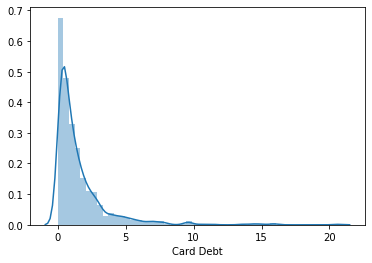

In [6]:
sns.distplot(My_Data['Card Debt'])

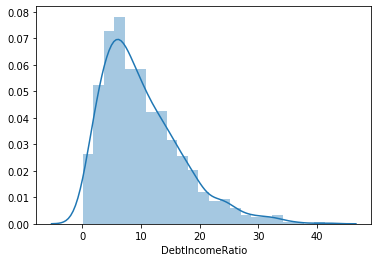

In [8]:
sns.distplot(My_Data['DebtIncomeRatio'])

In [9]:
### Let's Cluster them to whether they are going to default or not

In [17]:
Mydata = My_Data.drop(['Address','Customer Id'], axis = 1)

In [18]:
Mydata

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,NaN,6.8
846,28,2,7,34,0.359,2.021,0.0,7.0
847,25,4,0,18,2.802,3.210,1.0,33.4
848,32,1,12,28,0.116,0.696,0.0,2.9


In [20]:
from sklearn.preprocessing import StandardScaler
X = Mydata.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.31212243, -0.37878978, -0.71845859, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [-0.76634938,  2.5737211 ,  1.38432469, ...,  1.51296181,
        -0.52379654,  0.39138677],
       [ 0.31212243,  0.2117124 ,  0.26803233, ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [ 2.46906604, -1.26454304, -0.74441888, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.76634938,  0.50696349, -0.484816  , ..., -0.70147601,
        -0.52379654, -1.08281745],
       [-0.76634938,  1.09746566,  0.44975434, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [27]:
ClusterNum = 5
k_means = KMeans(init = 'k-means++', n_clusters = ClusterNum, n_init =12)
k_means.fit(X)
labels = k_means.labels_

In [28]:
Mydata['Clus_km'] = labels
Mydata

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,41,2,6,19,0.124,1.073,0.0,6.3,0
1,47,1,26,100,4.582,8.218,0.0,12.8,1
2,33,2,10,57,6.111,5.802,1.0,20.9,4
3,29,2,4,19,0.681,0.516,0.0,6.3,0
4,47,1,31,253,9.308,8.908,0.0,7.2,2
...,...,...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,NaN,6.8,0
846,28,2,7,34,0.359,2.021,0.0,7.0,0
847,25,4,0,18,2.802,3.210,1.0,33.4,0
848,32,1,12,28,0.116,0.696,0.0,2.9,0


In [29]:
Mydata.groupby('Clus_km').mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,
0,31.294664,1.591647,4.429234,24.403712,0.811794,1.661821,0.311295,10.182135
1,40.865079,1.936508,14.396825,77.420635,2.932381,5.353556,0.186275,10.960317
2,46.600000,2.300000,21.200000,270.900000,7.884000,13.375200,0.428571,8.210000
3,44.285714,2.309524,19.571429,133.690476,4.196357,8.347976,0.133333,9.473810
4,36.564315,1.676349,10.473029,45.962656,1.518037,3.077996,0.222222,9.943568


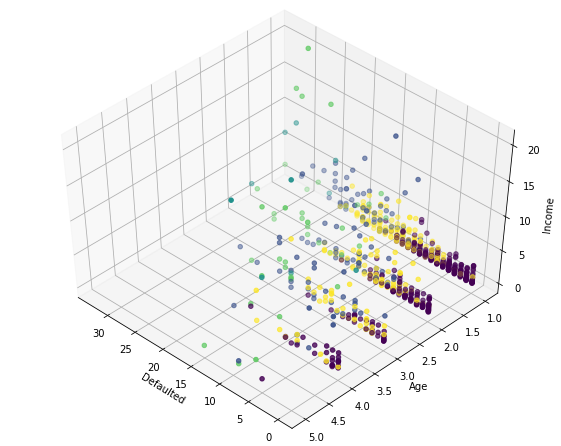

In [34]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Defaulted')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))